In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.feature_extraction.text import TfidfVectorizer
from stemming.porter2 import stem
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

## Load the dataset

In [2]:
df = pd.read_json('../Datasets/Sms_spam_1.json').sort_index()

## Explore the dataset

In [3]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5574, 2)

In [5]:
df['label'].unique()

array([0, 1])

In [6]:
df['label'].value_counts(normalize=True)

0    0.865985
1    0.134015
Name: label, dtype: float64

## Select the features

In [7]:
x = df['message']
y = df['label']

## Split into train and test sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

## Define a stemming tokenizer

In [9]:
def tokenizer_porter(doc):
  return [stem(word) for word in doc.split()]

## Vectorize the messages

In [10]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer = tokenizer_porter)

In [11]:
x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

## Hyperparameter optimization with cross-validation

In [12]:
estimator = LogisticRegression(penalty='l1')

parameters = {'C': (10**2, 10**3, 10**4, 10**5, 10**6)}

grid_search = GridSearchCV(estimator, parameters, cv =5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': (100, 1000, 10000, 100000, 1000000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [13]:
grid_search.best_score_

0.88479307823727549

In [14]:
grid_search.best_params_

{'C': 100000}

## Make predictions using the best model

In [15]:
lr = grid_search.best_estimator_ # best model

In [16]:
y_pred = lr.predict(x_test)

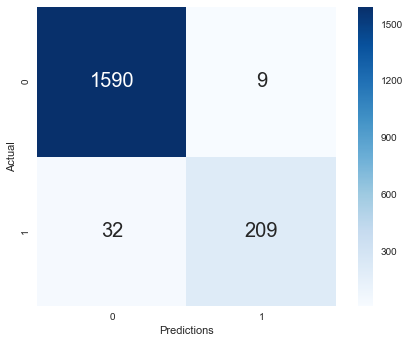

In [17]:
table = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})
plt.show()

## Evaluate the best model

In [18]:
lr.score(x_test,y_test) #Accuracy

0.97771739130434787

In [19]:
f1_score(y_test,y_pred)

0.91067538126361658